**AdaBoost - GridSearchCV**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions

**Load Dataset**

In [2]:
# Data Generation
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
print(X.shape), print(y.shape)

(500, 2)
(500,)


(None, None)

In [3]:
print(X[:5])
print(y[:5])

[[-0.09323862  0.29904164]
 [ 0.41589841  1.11023783]
 [ 0.09875051  0.05437662]
 [-0.3186161  -0.4985571 ]
 [-0.60173643  1.13675809]]
[1 0 1 0 0]


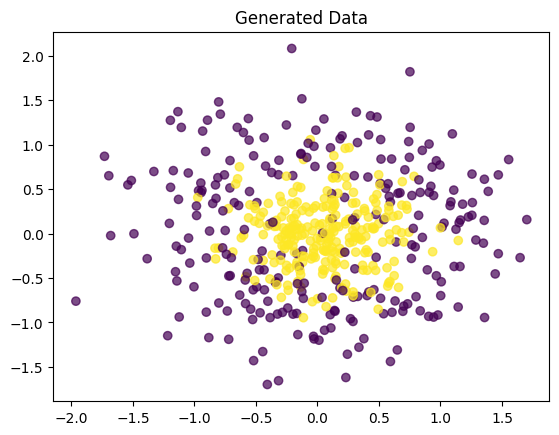

In [4]:
# Visualize the dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Generated Data")
plt.show()

In [5]:
# Initial AdaBoost with cross-validation
abc = AdaBoostClassifier()
accuracy = np.mean(cross_val_score(abc, X, y, scoring='accuracy', cv=10))
print(f"Initial AdaBoost Accuracy: {accuracy:.4f}")

Initial AdaBoost Accuracy: 0.7860


In [6]:
# Fitting the model
abc.fit(X, y)

AdaBoostClassifier()

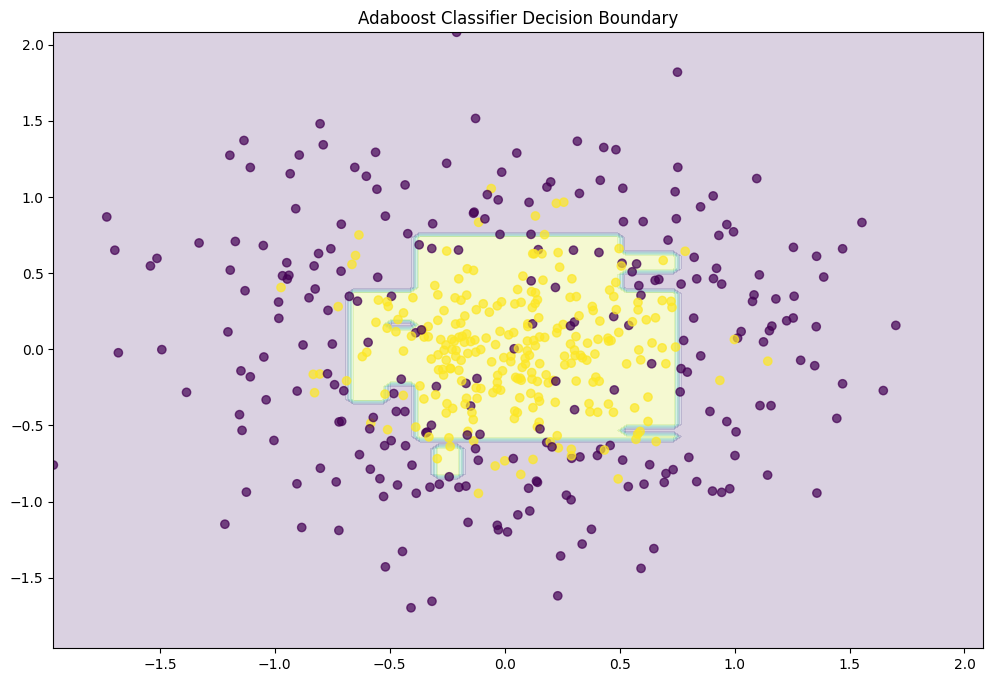

In [7]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier Decision Boundary")
    plt.show()

# Plotting initial decision boundary
plot_decision_boundary(abc, X, y)

In [8]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [9]:
# Grid Search
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='accuracy')

In [10]:
# Summarize the best score and parameters
print(f"Best score: {grid_search.best_score_:.4f}")
print(f"Best parameters: {grid_search.best_params_}")

Best score: 0.8320
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


In [11]:
# Fitting AdaBoost with best parameters
best_abc = grid_search.best_estimator_
best_abc.fit(X, y)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500)

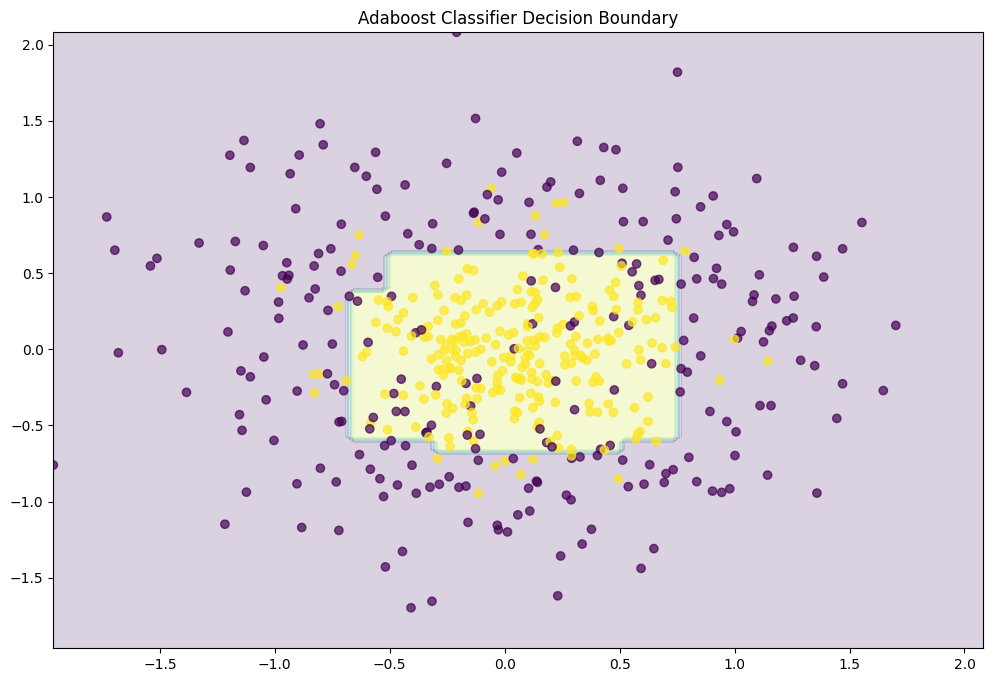

In [12]:
# Plotting decision boundary of the best model
plot_decision_boundary(best_abc, X, y)

In [15]:
# Testing or Prediction
random_points = np.array([[0.2, 0.5], [0.7, -0.4], [-0.6, 0.3], [0.1, -0.7]])
predictions = best_abc.predict(random_points)
print(predictions)

[1 1 1 0]
